<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5">  Scientific Calculus and Applications (SCA) </font></p>
<p><font size="5">  Optimization lab </font></p>
</p></br>
<p><font size="4"> IMT Atlantique</span></p>
</p>
</CENTER>

----------------------------

# <span style="color:#00B8DE"> Gradient and Newton algorithms</span>

We look for the minimum of the function $f(x,y)=(x-2)^2 (\sin(y-1))^2+x^2+y^2$ by testing gradient and Newton algorithms.

**1)** Visualize contour plots of $f$ on the square with vertices $(\pm 3,\pm 3)$. We can use *imshow* and *contour* functions from *matplotlib*. Plot also the minimum of $f$ at point $(0.0917, 0.7790)$.

**2)** Calculate the gradient of $f$ and implement the gradient descent algorithm.

**3)** Calculate the Hessian of $f$ and implement the Newton algorithm.

**4)** Compare the two optimization algorithms for the minimization of $f$ (visualize the evolution of the solutions). Take an initialization at point $(−1, 1)$ and stop the algorithms when residual errors are smaller than $10^{−3}$.

## <span style="color:#00B8DE">References</span>

> [Gradient algorithm](http://en.wikipedia.org/wiki/Gradient_descent)

> [Newton algorithm](http://en.wikipedia.org/wiki/Newton%27s_method_in_optimization)

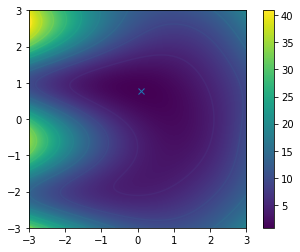

In [1]:
# 1)

import numpy as np
import pylab as pl

# return f

def f(x,y):
    return (((x-2)**2)*((np.sin(y-1))**2) + x**2 + y**2)

pas = 0.01

x = np.arange(-3,3,pas)
y = np.arange(-3,3,pas)
X,Y = np.meshgrid(x,y)

Z = f(X,Y)

xmin = -3
xmax = 3

ymin = -3
ymax = 3



# display the function

pl.imshow(Z, interpolation="bicubic",
       origin="lower", extent=[xmin,xmax,ymin,ymax])
pl.colorbar()

# display levels lines

contour = np.linspace(0,40,10) 
pl.contour(X, Y, Z, contour)

# display the minimum

pl.plot(0.0917,0.7790,"x")

pl.show()


In [2]:
# 2)

# Compute the first coordinate of the gradient

def grad_x(x,y):
    return 2*(x-2)*(np.sin(y-1)**2)+2*x

# Compute the second coordinate of the gradient

def grad_y(x,y): 
    return ((x-2)**2)*(np.sin(2*y-2))+2*y

# Compute the gradient

def grad_f(x,y):
    return np.array([grad_x(x,y),grad_y(x,y)])

# Gradient descent algorithm

L1 = [] # list wich will contain coordinates at each iteration 
epsilon = 0.001 # treshold to stop the algorithm
p = 0.1


x_k = np.array([-1,-1])
x_k1 = x_k - p * grad_f(x_k[0],x_k[1])
L1.append(x_k) 
L1.append(x_k1)

# algorithm iterations

while np.linalg.norm(x_k1 - x_k) > epsilon:
    x_k = x_k1
    x_k1 = x_k - p * grad_f(x_k[0],x_k[1])
    L1.append(x_k)
    L1.append(x_k1) 
    
print('Minimum obtained with gradient descent:',x_k1)

Minimum obtained with gradient descent: [0.09618402 0.7778956 ]


We obtain a minimum close to the one given.

In [3]:
# 3)


def hess2x(x,y):
    return 2*(np.sin(y-1)**2)+2

def hess2y(x,y):
    return 2*((x-2)**2)*np.cos(y-1)+2

def hessxy(x,y):
    return 2*(x-2)*np.sin(2*y-2)

# According to the Schwarz theorem, we dont need to compute the other derivate


# Hessian calcuulus 

def hessienne(x,y):
    H = np.zeros((2,2))
    H[0,0], H[0,1], H[1,0], H[1,1] = hess2x(x,y), hessxy(x,y), hessxy(x,y), hess2y(x,y)
    return (H)

# Newton's algorithm

L2 = []

# algorithm initialization

epsilon = 0.001 
x_k2 = np.array([-1,-1])
x_k3 = x_k2 - np.dot(np.linalg.inv(hessienne(x_k2[0],x_k2[1])),grad_f(x_k2[0],x_k2[1]))
L2.append(x_k2) 
L2.append(x_k3) 

# algorithm iterations 

while np.linalg.norm(x_k3 - x_k2) > epsilon: 
    x_k2 = x_k3
    x_k3 = x_k2 - np.dot(np.linalg.inv(hessienne(x_k2[0],x_k2[1])),grad_f(x_k2[0],x_k2[1]))
    L2.append(x_k2)
    L2.append(x_k3) 
    

print('Minimum obtained with Newton method:',x_k3)



Minimum obtained with Newton method: [0.09173192 0.7789538 ]


We remark that we obtain a minimum closer to the the given than the previous we obtained: it seems that Newton's method is more efficient than gradient descent.

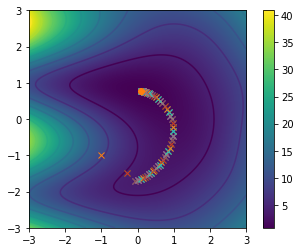

In [146]:
# 4) : solutions evolution for the gradient descent

pas = 0.01

x = np.arange(-3,3,pas)
y = np.arange(-3,3,pas)
X,Y = np.meshgrid(x,y)

Z = f(X,Y)

xmin = -3
xmax = 3

ymin = -3
ymax = 3

contour = np.linspace(0,40,10)

pl.imshow(Z, interpolation="bicubic",
       origin="lower", extent=[xmin,xmax,ymin,ymax])
pl.colorbar()

pl.contour(X, Y, Z, contour)

pl.plot(0.0917,0.7790,"x")

for x in L1:
    pl.plot(x[0],x[1],'x')

pl.plot(0.0917,0.7790,"o")
pl.show()

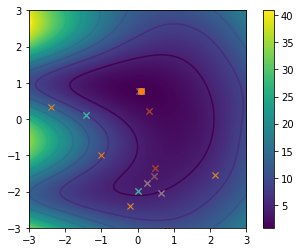

In [147]:
# 4) Solutions evolution for Newtons method

pas = 0.01

x = np.arange(-3,3,pas)
y = np.arange(-3,3,pas)
X,Y = np.meshgrid(x,y)

Z = f(X,Y)

xmin = -3
xmax = 3

ymin = -3
ymax = 3

contour = np.linspace(0,40,10)

pl.imshow(Z, interpolation="bicubic",
       origin="lower", extent=[xmin,xmax,ymin,ymax])
pl.colorbar()

pl.contour(X, Y, Z, contour)

pl.plot(0.0917,0.7790,"x")

for x in L2:
    pl.plot(x[0],x[1],'x')

pl.plot(0.0917,0.7790,"o")
pl.xlim(-3,3)
pl.ylim(-3,3)
pl.show()

We remark that in the two cases there is a convergence to the given minimum. The minimum is represented by a square and the points by circles.<br>
We remark that the convergence is way faster with Newton than gradient descent. Here, in this case, Newton method seems to be more efficient and to work better than the gradient descent.
<br> <br>
NB: in the second curve, there are some point that diverge and that we can't see on the graph: we didn't represented them.